In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
clusters <- read.table(
    "../../Abed-SI-Mapping/metadata_skin_samples_reformatted.csv", 
    row.names=1,
    header=TRUE, 
    sep=","
)
head(clusters)

,predicted.ID
,<int>
SPIRT5Pre-Skin336_AAACCTGCAAAGAATC-1,1
SPIRT5Pre-Skin336_AAACCTGCAAAGCGGT-1,4
SPIRT5Pre-Skin336_AAACCTGCACATAACC-1,1
SPIRT5Pre-Skin336_AAACCTGCATACTCTT-1,1
SPIRT5Pre-Skin336_AAACCTGGTAAGAGGA-1,1
SPIRT5Pre-Skin336_AAACCTGGTACAGTGG-1,5


In [6]:
print.cluster.overlap <- function(seurat.fn, label, clusters, cluster.id, min.cells = 1) {
    load(seurat.fn)
    seurat <- AddMetaData(object = seurat, metadata=clusters)
    print(DimPlot(seurat) + labs(title=label))
    print(DimPlot(seurat, cells.highlight = rownames(filter(clusters, predicted.ID == 2))) + labs(title=label))
    seurat <- seurat |> FindNeighbors(dims = 1:10, reduction="harmony") |> FindClusters(resolution = 0.5)
    print(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident))
    overlapping_clusters <- names(which(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters)["2",] >= min.cells))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident)[overlapping_clusters, ])    
    seurat
}

Computing nearest neighbor graph

Computing SNN



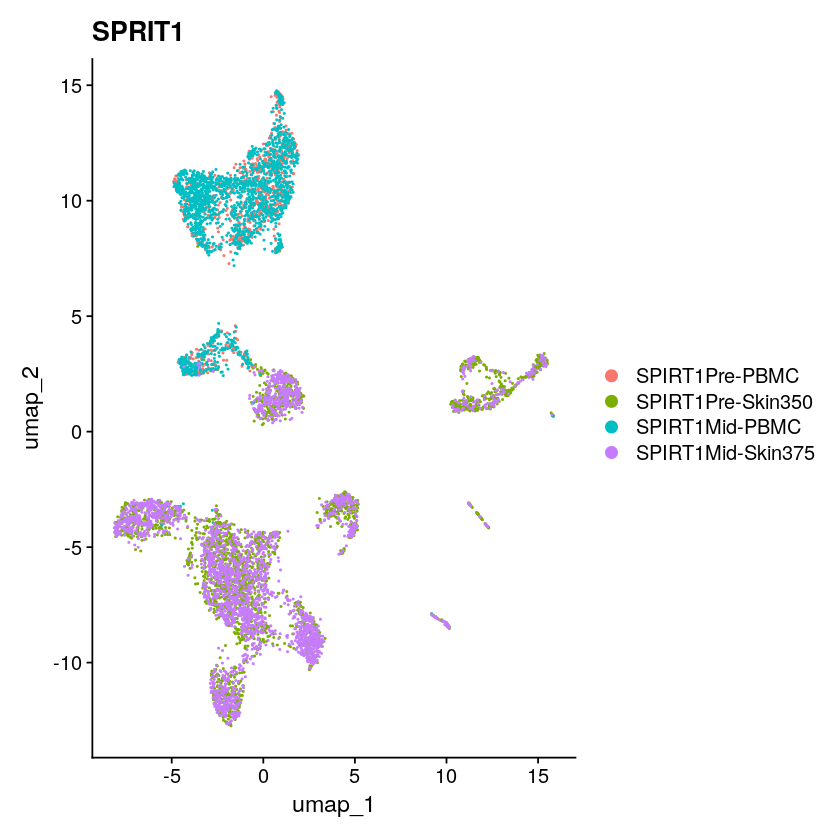

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7987
Number of edges: 266921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9182
Number of communities: 15
Elapsed time: 0 seconds
    
       0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  1  620   1   3  31 147  13   0  56   1   0   1   0   0   0   0
  2    9   0   0   1  44   1   0  38 384   0   3   0   0   0   0
  3    9   2   0 557   7   0   0   0   1   0   0   0   1   0   0
  4  316   0   0  24 252  16   0  94   3   0   3   0   0   0   0
  5    4   0   0   0   2 511  12  77   2   0   1   0   0   0   0
  6   19   0   0   0   1  13   0  58   2   0  29   0   0   0   0
  7  226   0   0   5  58   6   0  27   0   0   2   0   0   0   0
  8   14   0   0   0   0   0   0   5   0   0   1   0   0   0   0
  9   27   0   0   0  37   5   0  39   1   0 133   0   1   0   0
  10   0   0   0   0   0   0  10   0   0   0 163   0   0   0   0
  11  12   0   0   3   6   1   0  

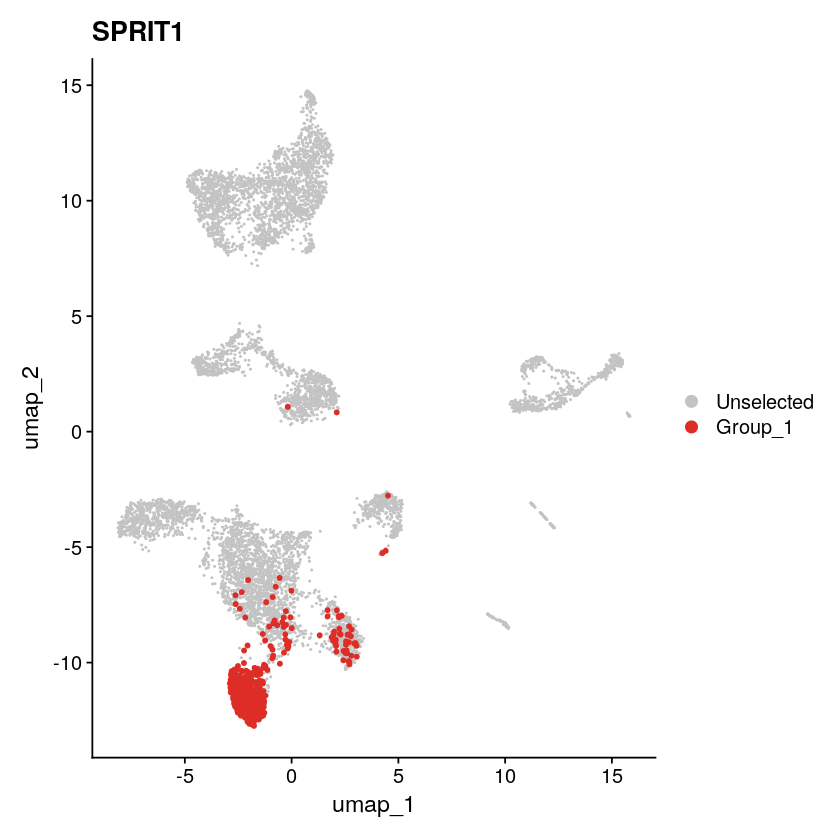

In [7]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT1.RData", "SPRIT1", clusters, "2")

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "images"       "project.name" "misc"        
[11] "version"      "commands"     "tools"

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 20 
 Number of cells: 7987 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$umap
A dimensional reduction object with key umap_ 
 Number of dimensions: 2 
 Number of cells: 7987 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$harmony
A dimensional reduction object with key harmony_ 
 Number of dimensions: 20 
 Number of cells: 7987 
 Projected dimensional reduction calculated:  TRUE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


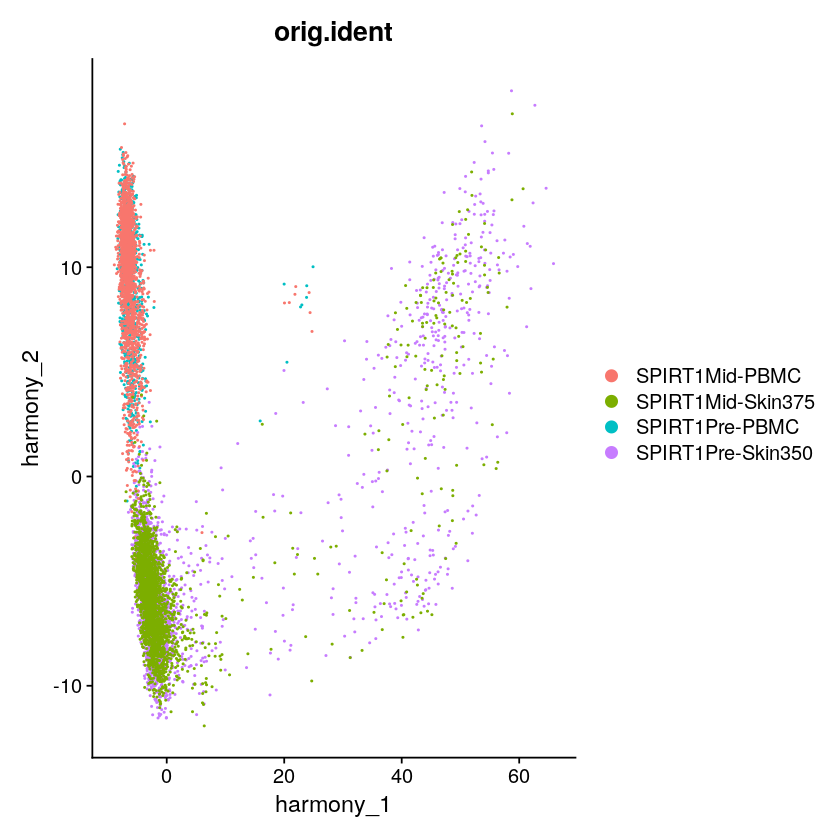

In [12]:
slotNames(s)
s@reductions
DimPlot(s, reduction="harmony", group.by="orig.ident")

Computing nearest neighbor graph

Computing SNN



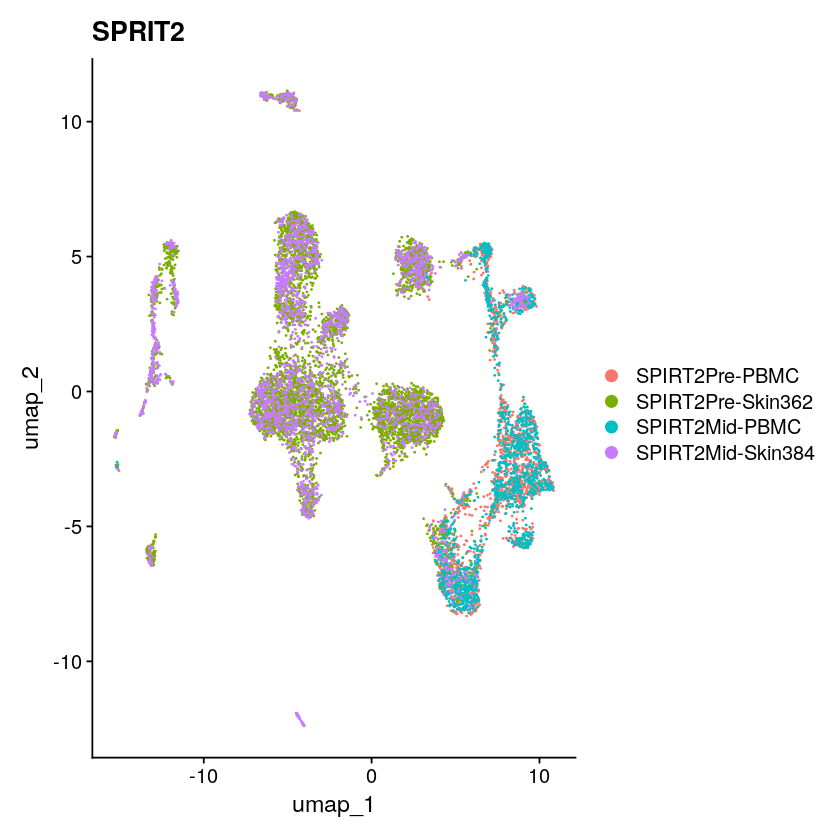

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11243
Number of edges: 371370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 15
Elapsed time: 1 seconds
    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  1   509    0   48  115  804   32    0    0    1    0    0    0    0    0    0
  2    10    0    1  620    8   15    0    0    7    0    0    0    0    0    0
  3     1    0 1295   16    8    0    0    0    0    0    0    0    0    0    0
  4   412    0   12  313  183   28    0    0    1    0    0    0    0    0    0
  5     3    0    0    0   17  660    0    0   16    0    1    0    0    0    0
  6   156    0    0    3   21   44    0    0  107    0    0    0    0    0    0
  7   133    0    8   64   43    1    0    0    0    0   24    0    0    0    0
  8    17    0    1    0   12    4    0    0    0    0    4    0    0    0    0
  9   234    0    1   18    

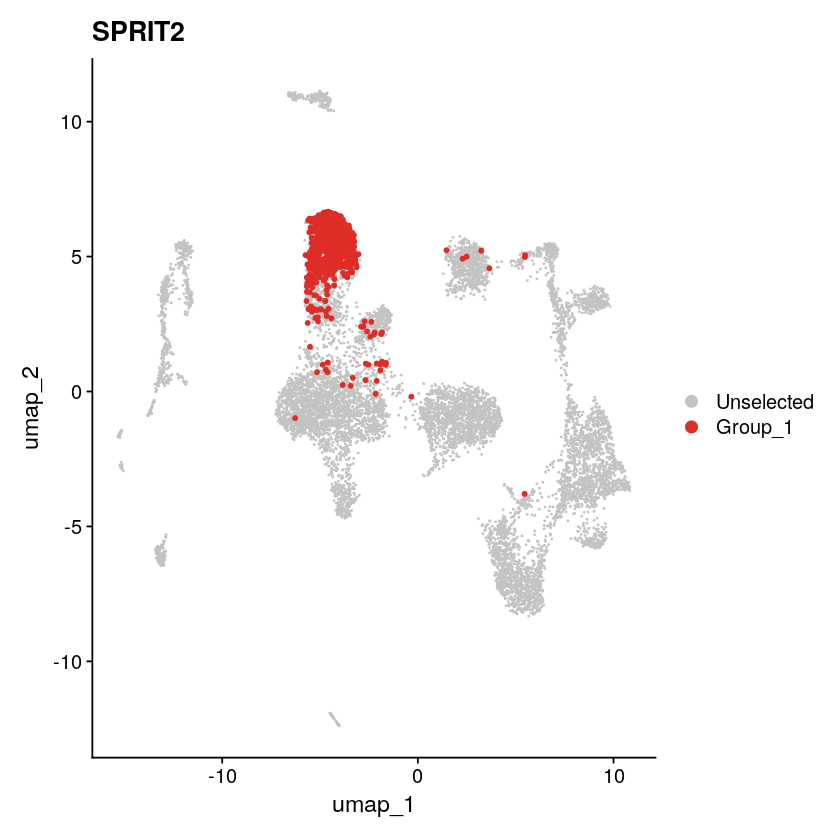

In [5]:
print.cluster.overlap("outs-harmonize1/SPIRT2.RData", "SPRIT2", clusters, "2")

Computing nearest neighbor graph

Computing SNN



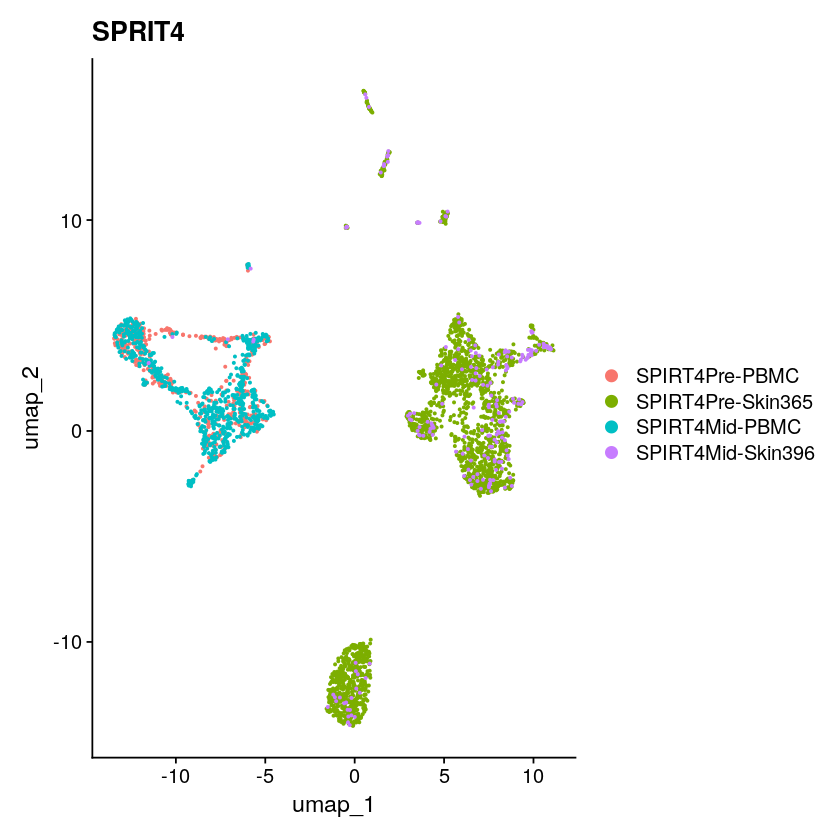

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3442
Number of edges: 110459

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 9
Elapsed time: 0 seconds
    
       0   1   2   3   4   5   6   7   8
  1  258   0   8   3   0  18   1   0   0
  2   15   0   0 426   0  20   0   0   0
  3    2   0 500   0   0   1   0   0   0
  4  213   0   5  10   0  16   0   0   0
  5   19   0   2   9   0 178   0   0   0
  6   48   0   0   3   0  17   0   0   0
  7  102   0   4   8   0   7   0   1   0
  8    4   0   0   1   0   1   0   0   0
  9   31   0   0  11   0  20   0   0   0
  10   0   0   0   0   0  45   0   0   0
  11   1   0   0   5   0   0   0   0   0
  14   2   0  12   0   0   0   0   0   0
  15  19   0   0   0   0   3   0   1   0
  18   0   0   0   0   0   0   0  12   0
  19   0   0   0   0   0   0   0   1   0
  21   0   0   0   0   0   0   0   4   0
  22   0   0   0   0   0   0   0  28   0
  23   0   0

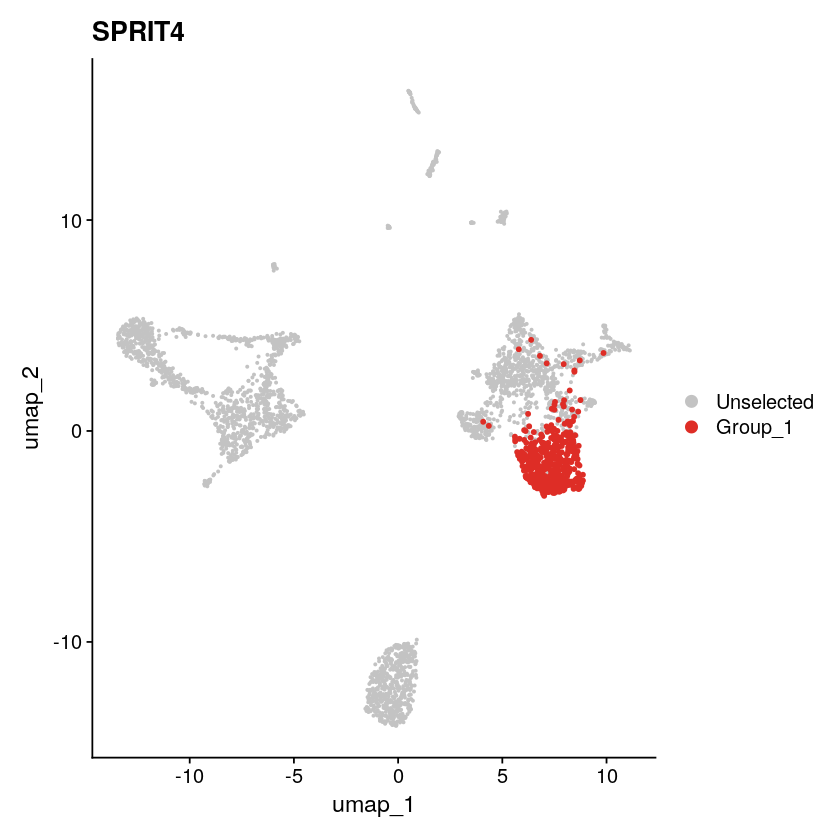

In [6]:
print.cluster.overlap("outs-harmonize1/SPIRT4.RData", "SPRIT4", clusters, "2")

Computing nearest neighbor graph

Computing SNN



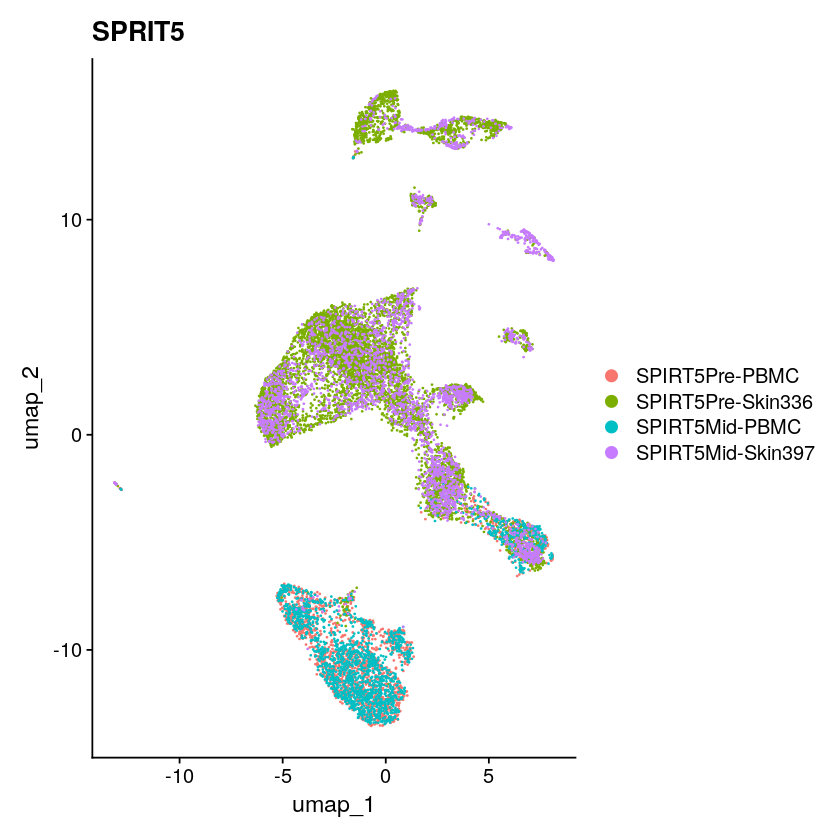

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13802
Number of edges: 444928

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9077
Number of communities: 14
Elapsed time: 1 seconds
    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13
  1  1527    0   24   29   17    0    4    0    0    0    2    0    0    3
  2    28    0  140   57  444    0    0    0    0    0    0    2    0    0
  3    27    0    5 1000    3    0    0    0    0    0    0    0    0    0
  4   685    0  109   53   61    0    0    0    0    0    0    0    0    0
  5    14    0 1319    1   71    0   84    0    0    0    0    3    0    1
  6    46    0   79    0   25    0    2    0    0    0    0    0    0    0
  7   285    0   22   18   16    0    0    0    0    0    1   26    0    1
  8    31    0    5    0    0    0    0    0    0    0    2    1    0    0
  9    46    0   54    2   77    0   11    0    0    0    0    9    0  11

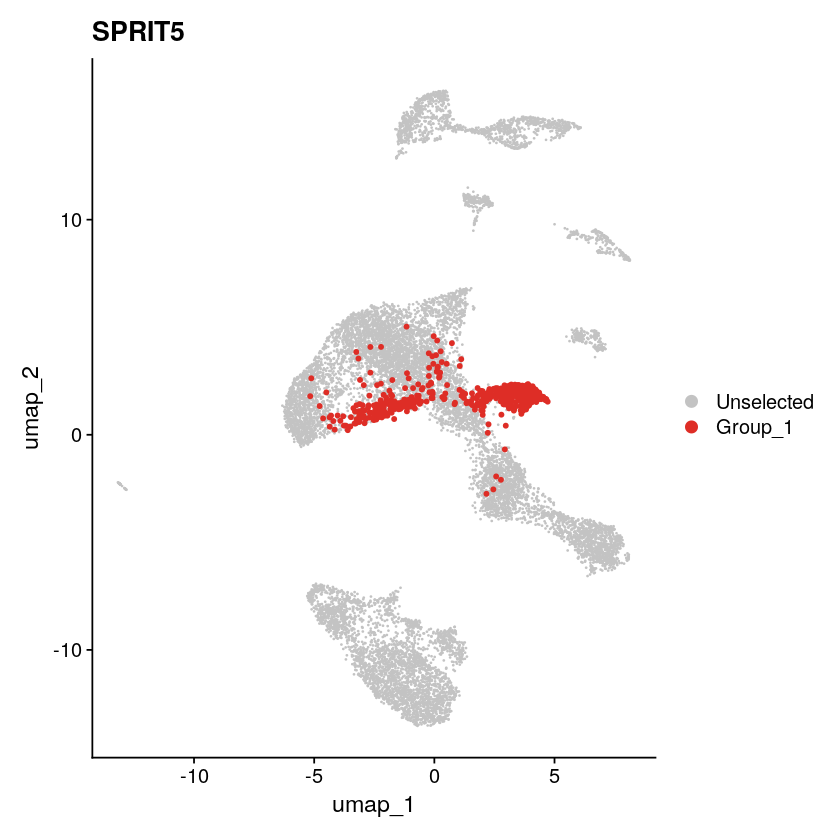

In [7]:
print.cluster.overlap("outs-harmonize1/SPIRT5.RData", "SPRIT5", clusters, "2")